# 4 Training, Testing and Loss
Hopefully, you have your perceptron working now :). With it, we'll put in practice some of the concepts we learnt on class! So, first of all, bring all the important code from the last notebook (you'll need ``add_bias()``, ``perceptron``, ``preprocess_data()`` and ``plot_data()``). I'm also giving you a function ``fit_line_dataset(x, y, data)`` that "crops" the line in your ``plot_data()`` and makes your figure nicer :). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fit_line_dataset(x, y, data):
    line = np.stack((x, y), axis=1)
    flags = np.all(np.logical_and(line < np.max(data, axis=0)[0:2], line > np.min(data, axis=0)[0:2]), axis=1)
    line = line[flags, :]
    new_x = line[:, 0]
    new_y = line[:, 1]
    # Plot these returns in your code "plot_data(data, w)"
    return new_x, new_y

def add_bias(X):
    n, d = np.shape(X)
    return np.concatenate((np.ones((n, 1)), X), axis=1)

def perceptron(X, classes):
    X = add_bias(X)
    eta, num_epochs = 1, 30
    
    n, d = np.shape(X)
    w = np.ones(d)    
    for t in range(num_epochs):
        for i, _ in enumerate(X):
            if (np.dot(X[i], w) * classes[i]) <= 0:
                w = w + eta * X[i] * classes[i]
    return w

def preprocess_data(data):
    X = data[:, 0:-1]
    classes = data[:, -1]
    
    return X, classes

def plot_data(data, w):
    classes = np.array(data[:, -1])
    for idx, cl in enumerate(classes):
        if cl == 1:
            plt.scatter(data[idx, 0], data[idx, 1], marker='+', c='blue')
        if cl == -1:
            plt.scatter(data[idx, 0], data[idx, 1], marker='_', c='red')

    x = np.arange(-100, 100, .1)
    y = (-w[0] - w[1] * line_x) / w[2]
    
    x, y = fit_line_dataset(x, y, data)

    plt.plot(x, y, 'k-')
    plt.show()

## 4.1 Tracking the Perceptron loss
Before anything, let's first count how many mistakes the perceptron makes in each epoch (the loss of that epoch), keep track of it over all the epochs in a vector and plot it at the end. We will be using this function only o

In [3]:
def perceptron_with_loss(X, classes):
    X = add_bias(X)
    eta, num_epochs = 1, 30
    
    n, d = np.shape(X)
    w = np.ones(d)
    loss = []
    for t in range(num_epochs):
        curr_loss = 0
        for i in range(n):
            if (np.dot(X[i], w) * classes[i]) <= 0:
                curr_loss += 1
                w = w + eta * X[i] * classes[i]
        loss.append(curr_loss)
    return w, loss

data = np.loadtxt('data/data.txt')

X, classes = preprocess_data(data)
w, loss = perceptron_with_loss(X, classes)

## 4.2 Training and Testing dataset
So, you were given a dataset and you came up with some classifier (the "Perceptron" Classifier). How can we measure how good it is? Well, we can use a **testing** dataset to do it. So, you find the best $w$ with a given dataset (the **training** dataset) and then test $w$ with the testing dataset. Simply, right?

But I just gave *one* dataset to you last time (``data.txt``)! Where are the training and testing dataset? Well, I guess the only option is to get them ``data.txt``. So, I'll give you a number (``ratio``) that signifies the size of the training set compared to the total size of ``data.txt``. In other words, you'll split the data in two and from them you'll get the training  and testing datasets. Would you be able to code it up? 

In [4]:
import numpy as np
def get_datasets(data, ratio):
    assert ratio > 0 and ratio < 1
    
    # Your code goes here
    n, d = np.shape(data)
    n_train = int(n * ratio)
    
    data_train = data[0:n_train, :]
    data_test = data[n_train:, :]

    X_train, X_test = data_train[:, 0:-1], data_test[:, 0:-1]
    classes_train, classes_test = data_train[:, -1], data_test[:, -1]    
    # Your code ends here
    
    return X_train, X_test, classes_train, classes_test

data = np.loadtxt('data/data.txt')
ratio = .7
X_train, X_test, classes_train, classes_test = get_datasets(data, ratio)

## 4.3 Testing the Perceptron
Now, let's test how good of a job the perceptron is doing. So, the it will output a variable $w$. How can you use it to classify one datapoint, say $x = [1, x_1, x_2]$? Create a function ``classify(x, w)`` that does it.

In [5]:
def classify(x, w):
    cla = np.sign(np.dot(w, x))
    return cla
    
x = np.array([1, 1, 2])
w = np.array([3, 4, 2])
print(classify(w, x))

1


Now, how about computing $w$ from the training set (``X_train`` and ``classes_train``) and then classify all the points in ``X_test``? To do so, store the resulting classes in a vector.

In [6]:
def classify_all_points(X, w):
    X = add_bias(X)
    n, d = np.shape(X)
    classification = np.zeros(n)
    
    for idx in range(n):
        classification[idx] = classify(X[idx, :], w)
    
    return classification

data = np.loadtxt('data/data.txt')
ratio = .7
X_train, X_test, classes_train, classes_test = get_datasets(data, ratio)

w = perceptron(X_train, classes_train)
classes = classify_all_points(X_test, w)
print(classes)

[ 1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1.]


Let's now plot the training and testing datasets along with the predicted decision boundary using the training data. Do do so, remember the function you had to plot the data and the separator (that line that you computed from $w$)? Now, make a function that receives the output of ``get_datasets()`` (``X_train``, ``X_test``, ``classes_train`` and ``classes_test``) and scatter the all these points in a way that the training data is much less opaque than the testing data (use this [link](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) as a reference).

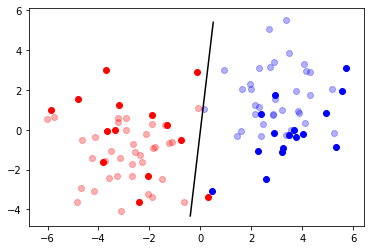

In [12]:
def plot_training_and_test_data(X_train, X_test, classes_train, classes_test, w):
    for idx, cl in enumerate(classes_train):
        if cl == 1:
            plt.scatter(X_train[idx, 0], X_train[idx, 1], c='blue', alpha=.3)
        if cl == -1:
            plt.scatter(X_train[idx, 0], X_train[idx, 1], c='red', alpha=.3)
            
    for idx, cl in enumerate(classes_test):
        if cl == 1:
            plt.scatter(X_test[idx, 0], data[idx, 1], c='blue')
        if cl == -1:
            plt.scatter(X_test[idx, 0], data[idx, 1], c='red')

    line_x = np.arange(-100, 100, .1)
    line_y = (-w[0] - w[1] * line_x) / w[2]
    
    line_x, line_y = fit_line_dataset(line_x, line_y, data)

    plt.plot(line_x, line_y, 'k-')
    plt.show()

data, ratio = np.loadtxt('data/data.txt'), .7
X_train, X_test, classes_train, classes_test = get_datasets(data, ratio)
w = perceptron(X_train, classes_train)

plot_training_and_test_data(X_train, X_test, classes_train, classes_test, w)

What can you say about the previous result?

## 4.4 Loss and accuracy

Awesome! Now, we've got a classification! Well, is it a good classification? We have the true classification in ``classes_test``. What is the zero-one loss value of that classification?

In [6]:
def loss(classification, classes_test):
    return np.sum(classification != classes_test)

ratio = .7
data = np.loadtxt('data/data.txt')
X_train, X_test, classes_train, classes_test = get_datasets(data, ratio)

w = perceptron(X_train, classes_train)
classes_perceptron = classify_all_points(X_test, w)

print(loss(classes_perceptron, classes_test))

2


Now that we are here, what would be the *accuracy* of our classification? How would you define accuracy? How would you compute it?

In [7]:
def accuracy(classification, classes_test):
    return np.sum(classification == classes_test)/ len(classes_test)

ratio = .7
data = np.loadtxt('data/data.txt')
X_train, X_test, classes_train, classes_test = get_datasets(data, ratio)

w = perceptron(X_train, classes_train)
classes_perceptron = classify_all_points(X_test, w)

print(accuracy(classes_perceptron, classes_test))

0.9333333333333333


That's it for today!